In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [24]:
def eqn(x, a): return a*np.sqrt(x)

def plotting_function(xs, ys, xlabel='', ylabel='', plot_shape='k*', round_to=4, tex_pos=(0.55, 0.15), legend_pos='best'):
    popt, pcov = curve_fit(f=eqn, xdata=xs, ydata=ys)

    text = r"If the Equation is $y = a\sqrt{x}$"
    text += " \nFor the best fit curve: \n"
    text += f"    a = {format(popt[0], '.5g')} ± {format(pcov[0][0]**0.5, '.4g')}\n"
    print(text)
    print("The curve looks like:")

    span = max(xs) - min(xs)
    a = 0.05
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.figure(figsize=(8,6))
    plt.plot(xs, ys, plot_shape, label='Data Points') 
    plt.plot(xFit, eqn(xFit, popt[0]), '--k', label='Best Fit Curve')

    plt.legend(loc=legend_pos)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.minorticks_on()

    plt.text(tex_pos[0], tex_pos[1], text, fontsize=12, transform=plt.gcf().transFigure)
    
    return popt[0], pcov[0][0]**0.5

In [15]:
f = np.array([2.210, 2.095, 1.901, 1.777, 1.570, 1.401, 1.283])
Bpm = np.array([23, 18, 15, 13, 11, 10, 7])*0.01
d = np.array([11.8, 13.0, 14, 15, 16, 17, 19])

If the Equation is $y = a\sqrt{x}$ 
For the best fit curve: 
    a = 4.772 ± 0.07102

The curve looks like:


Text(0, 0.5, 'Resonant Frequency $f_{res}$ (Hz)')

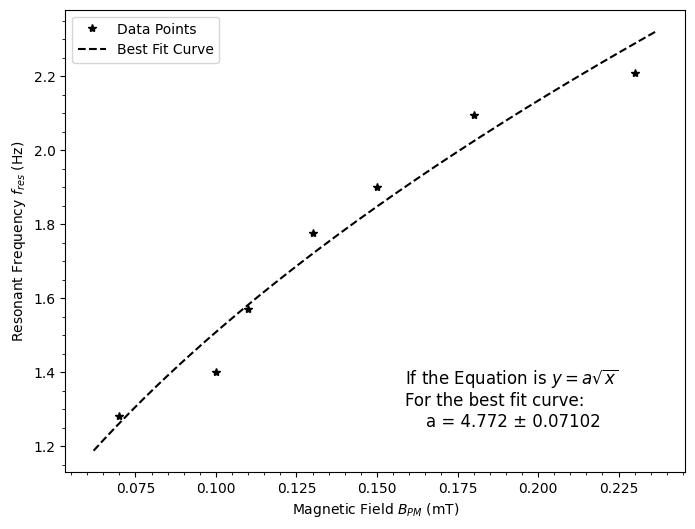

In [25]:
slope = plotting_function(Bpm, f)
plt.xlabel(r'Magnetic Field $B_{PM}$ (mT)')
plt.ylabel(r'Resonant Frequency $f_{res}$ (Hz)')

In [14]:
mbyJ = (slope[0]*2*np.pi)**2
mbyJ

899.0126428476376

In [93]:
err_H0 = H0_1*np.sqrt((slope1[1]/slope1[0])**2 + (0.2/p)**2)
err_g = g1*np.sqrt((1e4/f1)**2 + (err_H0/H0_1)**2)
err_H0, err_g

(0.20656586847165942, 0.1187884481758661)

In [18]:
table1 = np.array([d, Bpm, f]).transpose()
print(tabulate(table1, tablefmt="latex"))

\begin{tabular}{rrr}
\hline
 11.8 & 0.23 & 2.21  \\
 13   & 0.18 & 2.095 \\
 14   & 0.15 & 1.901 \\
 15   & 0.13 & 1.777 \\
 16   & 0.11 & 1.57  \\
 17   & 0.1  & 1.401 \\
 19   & 0.07 & 1.283 \\
\hline
\end{tabular}
